In the below, <code>test_video.pkl</code> is the output of the "identify_polygon" python script, <br>
which allows choose your desired polygonal subregion.

In [75]:
from skimage import io, filters
import detectda as dtda
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2

impol = dtda.ImageSeriesPickle('detectda/tests/test_video.pkl', div=32, n_jobs=2)

In [3]:
#Fit persistence diagrams for every image in the polygonal region of the test video
impol.fit(sigma=2)

Video processed in 29.3809 seconds


In [4]:
#Run these routines to get persistent entropy and the ALPS statistic
impol.get_pers_entr(neg=False)
impol.get_alps()

Text(0, 0.5, 'Persistent entropy')

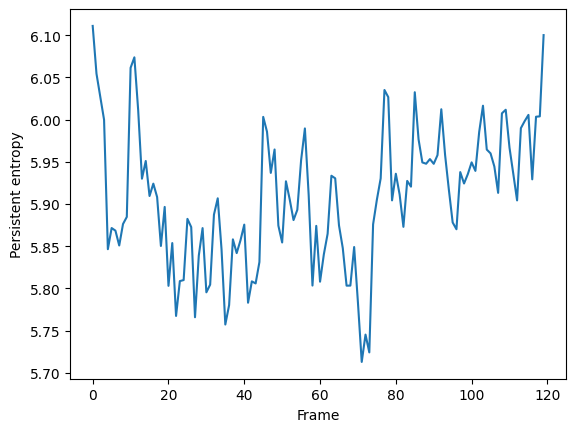

In [5]:
#Plot the persistent entropy across all of the frames
plt.plot(impol.pers_entr)
plt.xlabel('Frame')
plt.ylabel('Persistent entropy')

In [8]:
#Run hypothesis testing using the observed image series above, by generating 500 Monte Carlo noise images
G = open('detectda/tests/test_video_vacuum.pkl', 'rb')
tv_vacuum = pickle.load(G)['video']
impol_vac = dtda.VacuumSeries(tv_vacuum, observed_ImageSeries=impol, parametric=False, div=32)
impol_vac.fit()
impol_vac.transform(500, "alps", conservative=True)

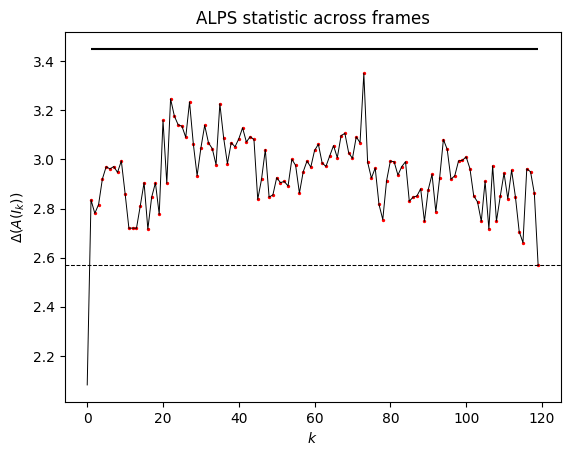

In [9]:
#Plot the results of the hypothesis testing
impol_vac.plot_hypo()